# Estimating angle distribution in proteins

Your cells consist of three main types of compounds. Sugars, fats and proteins. While all of them are important for proper functioning of the cell, it is especially proteins that make or break its intricate machinery.

From a chemical standpoint, protein is a linear polymer - a chain of connected monomer units also known as amino acids. What's interesting is that each of these linear chains tends to fold into a highly organised structure in the process of protein folding. Here is an example how protein may look like:
<img src="protein.png" alt="Protein structure example" style="width: 300px;"/>

## Two ways of describing protein structure

Since proteins are well organised, is there some pattern to the structure? One way to think about it is that the structure of a protein consisting of $N$ amino acids can not only be fully described by $3N$ cartesian coordinates of those amino acids, but also by angles between them. There are a total of $2N - 5$ angles that fully describe a protein, which can be further divided into two categories. $N-2$ bond angles $\beta_i$ between monomers $N_{i}{\dots}N_{i+1}{\dots}N_{i+2}$ and $N-3$ torsion angles $\tau_i$ between plan that contains monomers $N_{i}{\dots}N_{i+1}{\dots}N_{i+2}$ and plan with monomers $N_{i+1}{\dots}N_{i+2}{\dots}N_{i+3}$.

Protein Data Bank (PDB - https://www.rcsb.org/) is a database that contains more than hundred thousand protein structures. Using PDB I have downloaded $25$ protein structures and stored corresponding bond and torsion angle values into `angles.csv` file. Each line contains a $(\beta_i,\tau_i)$ angle pair. Let's import the file using module `pandas`:

In [1]:
import pandas as pd
filename = 'angles.csv'
angles = pd.read_csv(filename, sep=';', header=None).values
print(angles)

[[1.68715  2.97397 ]
 [1.66668  2.84583 ]
 [2.19064  2.45935 ]
 ...
 [1.78844  0.262178]
 [1.97756  1.55442 ]
 [2.59687  2.80019 ]]


Now that we have successfully imported the file, let's visualise it with `matplotlib`.

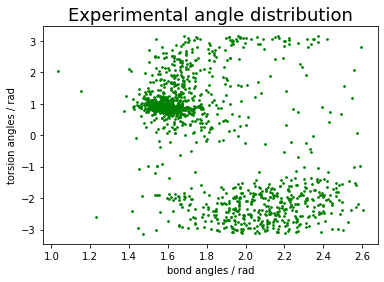

In [65]:
import matplotlib.pyplot as plt
X = angles[:,0]
Y = angles[:,1]
plt.scatter(X, Y, s=3, c='g')
plt.title("Experimental angle distribution", fontsize=18)
  
plt.xlabel('bond angles / rad', fontsize=10)
plt.ylabel('torsion angles / rad', fontsize=10)
plt.show()

We can clearly see two highly occupied areas around $[1.6,1.0]$ and $[2.2,-2.0]$. However scatterplot is not a perfect way of displaying density. One easy way of density estimation is using a histogram. It's shape highly depends on the width of the boxes and position of its borders. We will instead try to estimate density by continuous function using the `KernelDensity` class from the `sklearn` module. 

Kernel is a mathematical function $K(x,b)$, controlled by the bandwidth parameter $b$. Given this form, the density estimate $\rho_K(x)$ at a point $x$ within a group of points $x_1, x_2, \dots, x_N$ is given by:

$\rho_K(x) = \displaystyle \sum_{i=1}^{N} K(x - x_i; b)$.

First and foremost we will import the `KernelDensity` class and than we are going write a function `kde_sklearn(x, x_grid, bandwidth)` that is going to fit the Kernel Density model on the data from `angles.csv` and return corresponding probability density function.

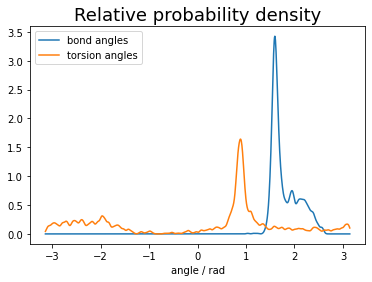

In [27]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt


def kde_sklearn(x, x_grid, bandwidth):
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(x[:, np.newaxis])
    # score_samples() returns logarithm of probability
    log_pdf = kde.score_samples(x_grid[:, np.newaxis])
    pdf = np.exp(log_pdf)
    return pdf

# plot angles density estimate
x_grid = np.linspace(-np.pi, np.pi, 1000)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(x_grid, kde_sklearn(angles[:,0], x_grid, 0.03), label='bond angles')
ax.plot(x_grid, kde_sklearn(angles[:,1], x_grid, 0.03), label='torsion angles')
plt.title("Relative probability density", fontsize=18)
plt.xlabel('angle / rad', fontsize=10)
ax.legend()
plt.show()

These two peaks actually correspond to two structural motifs that frequently occur in a protein, $\alpha$-helix and $\beta$-sheet, and therefore contribute the most to the angle distribution. You can see them even in the protein picture in the introductory section.
<img src="motives.jpg" alt="Structural motives" style="width: 200px;"/>


We mentioned earlier that $K(x,b)$ takes a bandwidth parameter $b$, which can be understood as a smoothing factor. A large bandwidth leads to a very smooth density distribution, however with a high bias. Conversely, small bandwidth leads to a more precise but unsmooth density distribution with high variance. Here is how to plot  the same density estimation using different bandwidths.

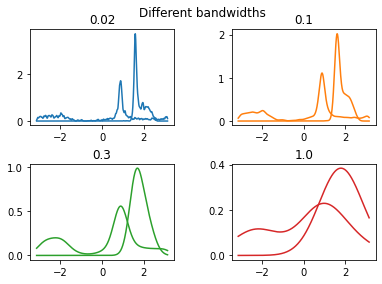

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Different bandwidths')
x_grid = np.linspace(-np.pi, np.pi, 1000)

ax1.plot(x_grid, kde_sklearn(angles[:,0], x_grid, 0.02), 'tab:blue')
ax1.plot(x_grid, kde_sklearn(angles[:,1], x_grid, 0.02), 'tab:blue')
ax2.plot(x_grid, kde_sklearn(angles[:,0], x_grid, 0.1), 'tab:orange')
ax2.plot(x_grid, kde_sklearn(angles[:,1], x_grid, 0.1), 'tab:orange')
ax3.plot(x_grid, kde_sklearn(angles[:,0], x_grid, 0.3), 'tab:green')
ax3.plot(x_grid, kde_sklearn(angles[:,1], x_grid, 0.3), 'tab:green')
ax4.plot(x_grid, kde_sklearn(angles[:,0], x_grid, 1.0), 'tab:red')
ax4.plot(x_grid, kde_sklearn(angles[:,1], x_grid, 1.0), 'tab:red')

ax1.set_title('0.02')
ax2.set_title('0.1')
ax3.set_title('0.3')
ax4.set_title('1.0')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
